# Introduction
- KaggleのNMRコンペ(https://www.kaggle.com/c/champs-scalar-coupling/data)

# Let's import everything I nead :)

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Data Preparation

**check datasets**

In [2]:
dir_data = './data/champs-scalar-coupling/'
path_list = glob.glob(dir_data + '*')
path_list

['./data/champs-scalar-coupling/magnetic_shielding_tensors.csv',
 './data/champs-scalar-coupling/structures.csv',
 './data/champs-scalar-coupling/mulliken_charges.csv',
 './data/champs-scalar-coupling/scalar_coupling_contributions.csv',
 './data/champs-scalar-coupling/train.csv',
 './data/champs-scalar-coupling/structures',
 './data/champs-scalar-coupling/test.csv',
 './data/champs-scalar-coupling/sample_submission.csv',
 './data/champs-scalar-coupling/dipole_moments.csv',
 './data/champs-scalar-coupling/potential_energy.csv']

**load csv**

In [3]:
path = './data/champs-scalar-coupling/structures.csv'
df = pd.read_csv(path)

# Pandas Plofiling

In [4]:
pdp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling bac

Number of variables,6
Number of observations,2358657
Total Missing (%),0.0%
Total size in memory,108.0 MiB
Average record size in memory,48.0 B
Numeric,4
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# EDA
- null なし

---

## Basics

In [7]:
df.head(5)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [6]:
df.tail(5)

,molecule_name,atom_index,atom,x,y,z
2358652,dsgdb9nsd_133885,11,H,-1.454004,-0.967309,1.459246
2358653,dsgdb9nsd_133885,12,H,0.277779,-2.697872,0.195770
2358654,dsgdb9nsd_133885,13,H,2.515854,-1.151784,0.527369
2358655,dsgdb9nsd_133885,14,H,0.013699,1.199431,-1.680192
2358656,dsgdb9nsd_133885,15,H,1.260745,-1.246754,-1.906767


In [8]:
df.isnull().sum(axis=0)

molecule_name    0
atom_index       0
atom             0
x                0
y                0
z                0
dtype: int64

## Plot

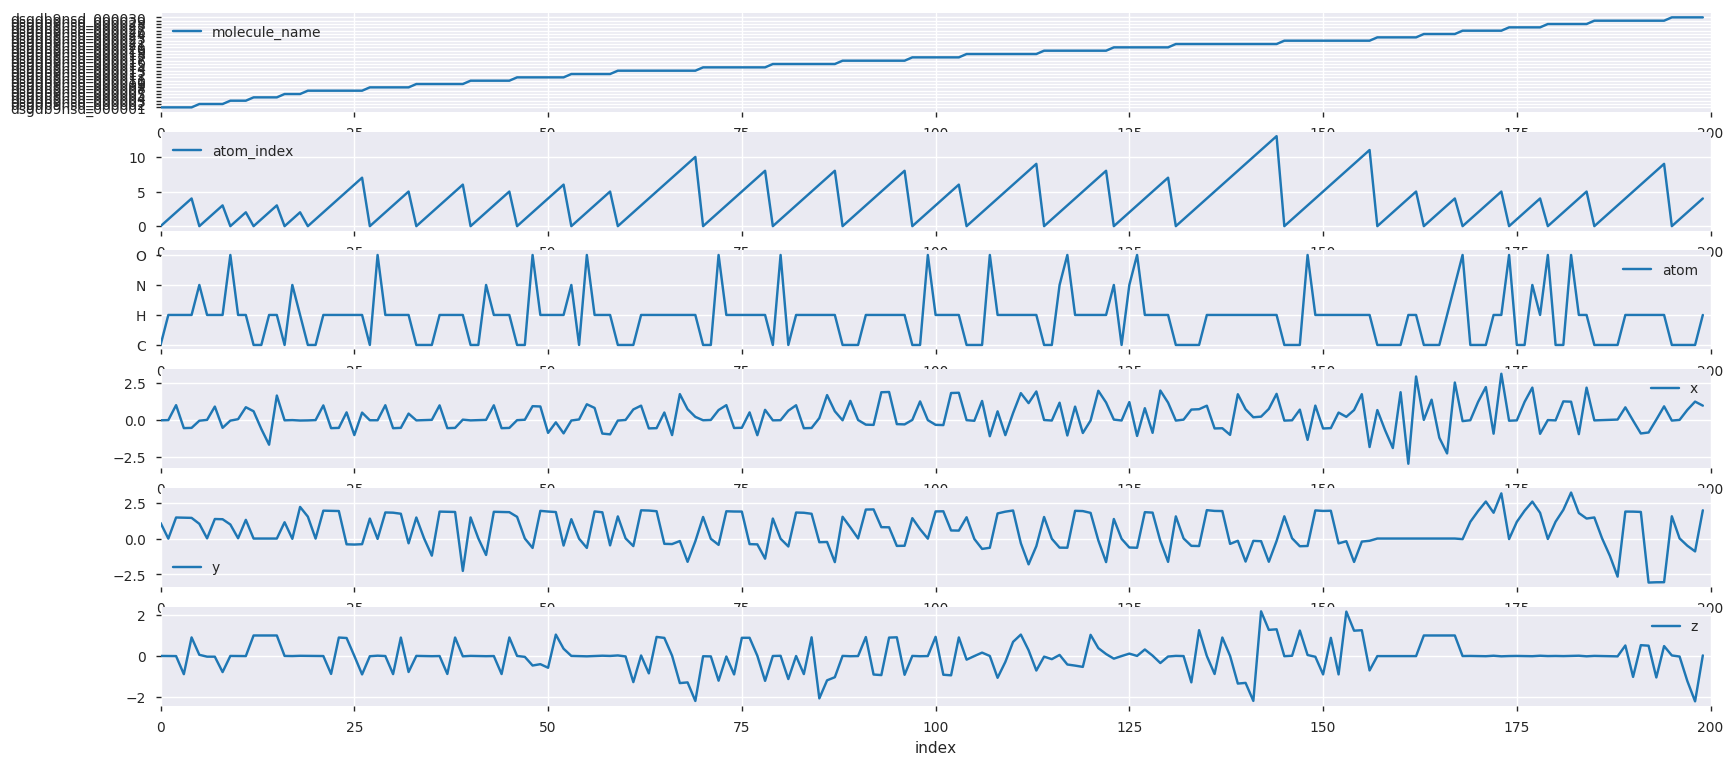

In [9]:
df_small = df.iloc[0:200,:]
fig, axs = plt.subplots(len(df_small.columns),1, figsize=(20, 9))
axs = axs.ravel()
for i in range(len(df_small.columns)):
    if df.iloc[0, i] == str:
        break
    axs[i].set_xlim(0, 200)
    axs[i].plot(df_small.iloc[:,i], label=df_small.columns[i])
    axs[i].set_xlabel('index')
    axs[i].legend()

## 相関見てみる

**pair plot**

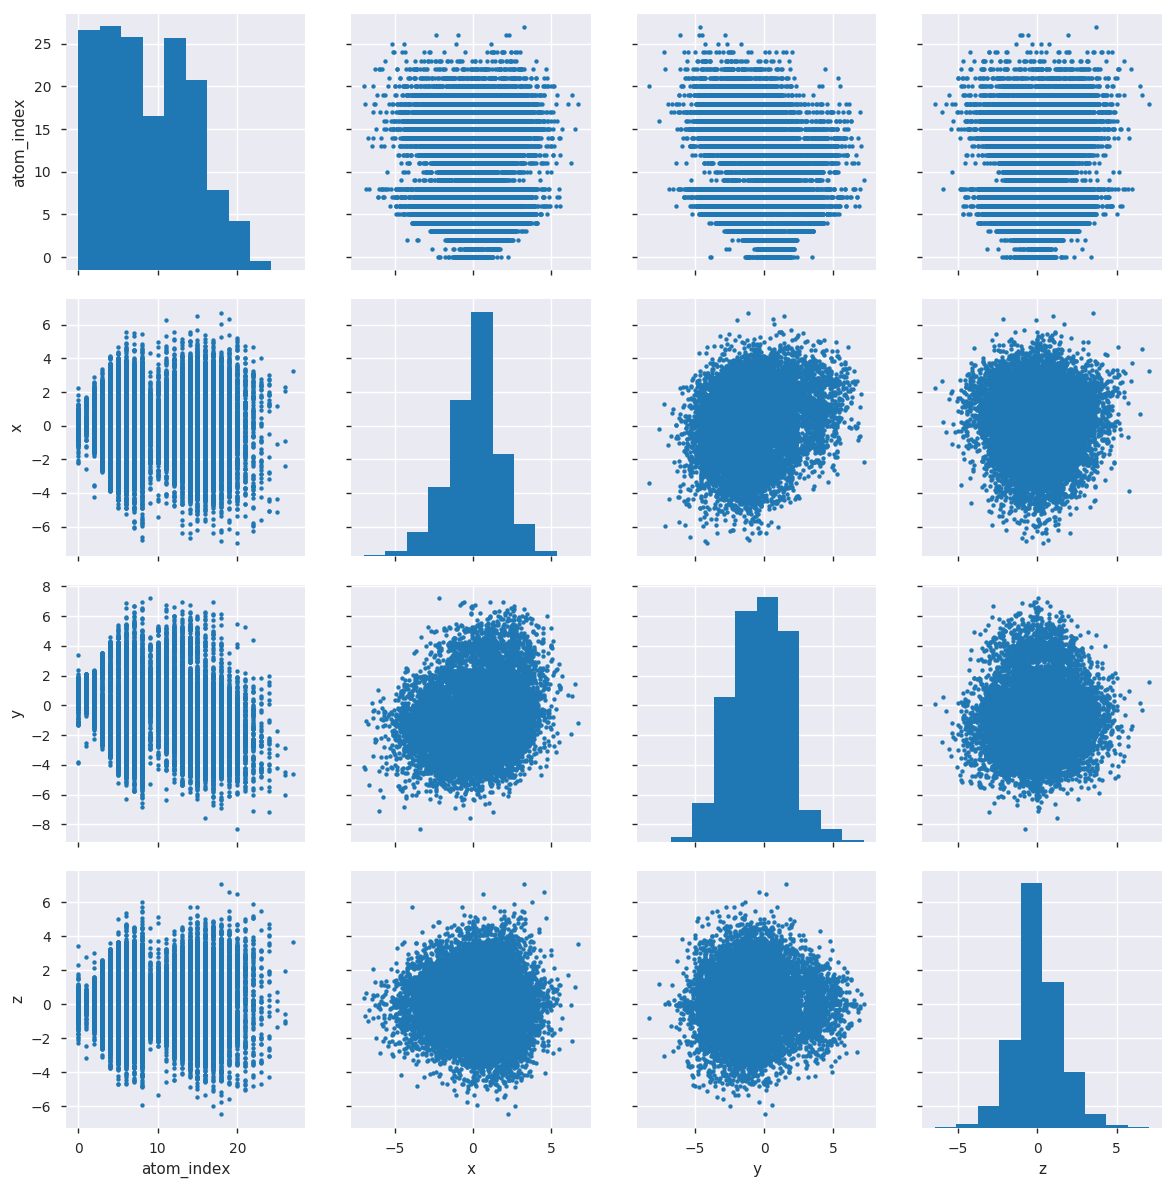

In [11]:
sns.pairplot(df.iloc[::100, :], height=3, plot_kws=dict(alpha=1, s=10, linewidth=0))

**heat map**

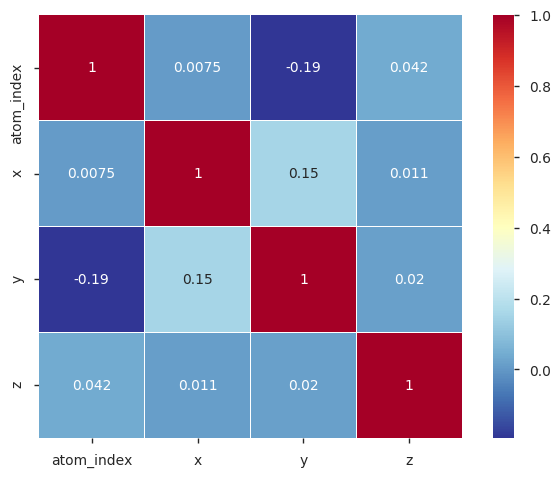

In [12]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='RdYlBu_r', linecolor='white', annot=True)